# Introducción a las librerías matemáticas y de gráficas
Una de las ventajas de Python es que tiene un sinfín de librerías con diversos objetivos. Aquí analizaremos las siguientes librerías:
* `math`: contiene funciones matemáticas básicas, como la raíz cuadrada y el factorial
* `numpy`: librería destinada al cálculo numérico eficiente
* `scipy`: librería destinada principalmente al desarrollo científico. Algunas funciones se solapan con `numpy`.
* `matplotlib`: librería destinada a graficar funciones y datos.


## Importando librerías
Para importar librerías, se puede utilizar el comando `import`.
Si se quiere usar una función traída de una librería, se debe escribir primero el nombre de la librería, seguido de un punto, y luego del nombre de la función.
Por ejemplo, importamos la librería `math` y usamos alguna de sus funciones.

In [9]:
import math

a = math.factorial(6)
print(a)

b = math.sqrt(4)
print(b)

720
2.0


Al importar una librería podemos cambiarle el nombre. Por ejemplo, para cambiar el nombre de `math` a `m`:

In [10]:
import math as m
a = m.factorial(4)
print(a)

24


## Cálculo numérico con numpy
`numpy` es usada para todo lo relacionado con el cálculo numérico. En particular, es muy útil para trabajar con matrices y realizar operaciones con ellas. Uno de los principales tipos de datos que ofrece es el `array`, que puede alojar tensores de $N$ dimensiones. 
Por ejemplo, podemos multiplicar dos matrices usando la función `dot`.

In [11]:
import numpy as np

M1 = np.array(
[[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9]])

M2 = np.array(
[[1, 1, 0],
 [0, 1, 1],
 [0, 0, 1]])

M3 = np.dot(M1, M2)

print(M3)

[[ 1  3  5]
 [ 4  9 11]
 [ 7 15 17]]


## Funciones adicionales usando scipy
`scipy` contiene una gran cantidad de funciones usadas en el ámbito académico. De la infinidad de funciones que tiene, nosotros estaremos interesados en aquellas que nos permitan trabajar con las soluciones de la ecuación de Schrödinger para los problemas tratados en el curso.
Por ejemplo, el módulo `scipy.special` contiene funciones que permiten evaluar los polinomios de Hermite.
Por ejemplo, para evaluar el polinomio de Hermite con $n = 1$ en $x = 4$, usamos:

In [17]:
import scipy.special as spe
print(spe.eval_hermite(1,4))

8.000000000000002


Da $8$ porque $H_1(x) = 2 x$. Notemos que no da exactamente 8, y esto se debe a que la función `eval_hermite` usa punto flotante (es decir, el tipo de datos `float`). Este tipo de datos normalmente maneja 15 cifras significativas de precisión.

Ahora estamos en condiciones de hacer algo un poco mas relacionado con nuestro curso. Por ejemplo, podemos escribir una función que devuelve las autofunciones del oscilador armónico adimensional, definidas por la siguiente expresión:

$$ \psi_n(x) = \frac{1}{\sqrt{2^n n! \sqrt{\pi}}} e^{-\frac{x^2}{2}} H_n \left ( x \right )$$

In [24]:
import math
import numpy as np
import scipy.special as spe

def wfn_harm(n, x):
    norm = 1/math.sqrt(2**n * math.factorial(n) * math.sqrt(math.pi)) 
    exp_part = np.exp(-x**2/2)
    poly_part = spe.eval_hermite(n, x)
    
    return norm*exp_part*poly_part

print(wfn_harm(1, 0))

0.0


## Graficando funciones

Para graficar funciones, `matplotlib` es una excelente herramienta. El siguiente ejemplo muestra cómo graficar la función $f(x) = x^2$:

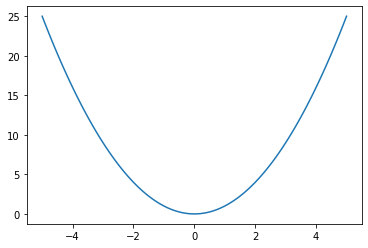

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**2

X = np.linspace(-5, 5, 101)

plt.plot(X, f(X))
plt.show()

Ahora podemos graficar nuestras autofunciones. Usando un bucle graficamos las primeras 3. Les agregamos una `label` para distinguir una de la otra.

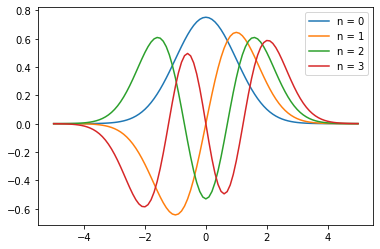

In [29]:
for n in range(4):
    plt.plot(X, wfn_harm(n, X), label = 'n = ' + str(n))
    
plt.legend()
plt.show()